In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
from pylab import *
hfont = {'fontname':'Times New roman'}

plot_path = '/Users/acodoreanu/Desktop/final_files/correct_precision/paper2/plots/omega/'
plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/plots/omega/'

mpl.rcParams['legend.numpoints'] = 1


In [2]:
# CIV values
sigma5_z = [4.77, 5.66]
sigma5_z_low  = [4.34, 5.19]
sigma5_z_high = [5.19, 6.13]
sigma5_values = [1.72, 0.345]
sigma5_bound_low  = [1.66, 0.229]
sigma5_bound_high = [2.21, 0.496]

si4_sigma5_z = [5.05, 5.65]
si4_sigma5_z_low  = [4.92, 5.19]
si4_sigma5_z_high = [5.19, 6.13]
si4_sigma5_values = [0.43, 0.178]
si4_sigma5_bound_low = [0.25, 0.11]
si4_sigma5_bound_high = [0.64, 0.225] 


# Diaz et al. sample A+B (12 QSOs)
zmin_D=[5.14]
zmax_D=[6.25]
z_D=[5.53]
omega_D=[0.38]
omega_D_upp=[0.53]
omega_D_low=[0.23]


# Simcoe (7) and Pettini (1) combined
zmin_SP=[4.35]
zmax_SP=[5.14]
z_SP=[4.81]
omega_SP=[2.08]
omega_SP_upp=[2.88]
omega_SP_low=[1.28]



# Angela’s reference simulation:
z_AG=np.array([8.0000000   ,
               7.5999999   ,
               7.1999998   ,
               6.8000002   ,
               6.4000001   ,
               6.0000000   ,
               5.5999999   ,
               5.1999998   ,
               4.8000002   ,
               4.4000001   ,
               4.0000000 ])

omega_AG=0.1*np.array([0.2344 ,0.6091 ,0.8549 ,1.114  
                       ,3.027  ,3.454  ,7.894  
                       ,10.87  ,10.85  ,13.75  ,23.03])

     
# V14
zmin_v14=[4.35, 5.30]
zmax_v14=[5.30, 6.20]
z_v14=[4.818, 5.634]
v14_cosmo_scalar = np.array([0.99, 0.99])
omega_v14=[1.4*1.05309, 0.84*1.05348]
omega_v14_upp=np.array([(1.4 + 0.3)*0.99, (0.84 + 0.33)*0.99]) 
omega_v14_low=np.array([(1.4 - 0.3)*0.99, (0.84 - 0.33)*0.99]) 



# V10
zmin_v10=[2, 2.5, 3.0, 3.5]
zmax_v10=[2.5, 3.0, 3.5, 4.0]
v10_cosmo_scalar = np.array([0.98, 0.98, 0.99, 0.99])
z_v10=np.array([2.25, 2.75, 3.25, 3.75])
omega_v10=np.array([5.0, 3.2, 2.4, 3.7])*v10_cosmo_scalar
omega_v10_upp=np.array([5.0 + 1.4, 3.2 + 0.8, 2.4 + 0.6, 3.7 + 1.0])*v10_cosmo_scalar
omega_v10_low=np.array([5.0 - 1.4, 3.2 - 0.8, 2.4 - 0.6, 3.7 - 1.0])*v10_cosmo_scalar




# MgII
zmin_mg2=[2.10,  3.0, 4.03]
zmax_mg2=[2.99, 3.95, 5.48]
z_mg2=[2.48, 3.41, 4.79]
omega_all_low_5s =  np.array([1.81e-08, 5.55e-09, 1.15e-07])*pow(10.0, 8) 	 
omega_all_5s =      np.array([2.25e-08, 7.30e-09, 4.02e-07])*pow(10.0, 8)  
omega_all_high_5s = np.array([5.24e-08, 44.90e-09, 21.77e-07])*pow(10.0, 8) 



omega_mg2=omega_all_5s
omega_mg2_upp=omega_all_high_5s
omega_mg2_low=omega_all_low_5s



mg2_color = [240/256, 230/256, 140/256]

b11_si4_sigma5_z = [2.09, 2.65, 3.35, 4.10]
b11_si4_sigma5_zmin=[1.85, 2.2, 3.0, 3.75]
b11_si4_sigma5_zmax=[2.2, 3.0, 3.75, 4.55]
b11_cosmo_scalar = np.array([0.84, 0.84, 0.85, 0.85])


b11_si4_sigma5_values = np.array([1.44, 1.02, 0.90, 1.57])*b11_cosmo_scalar
b11_si4_sigma5_bound_low = np.array([1.44-0.71, 1.02-0.50, 0.90-0.41, 1.57-0.91])*b11_cosmo_scalar
b11_si4_sigma5_bound_high = np.array([1.44+0.71, 1.02+0.50, 0.90+0.41, 1.57+0.91])*b11_cosmo_scalar





b11_c4_sigma5_z = [1.96, 2.65, 3.35, 4.10]
b11_c4_sigma5_zmin=[1.6, 2.2, 3.0, 3.75]
b11_c4_sigma5_zmax=[2.2, 3.0, 3.75, 4.55]


b11_c4_sigma5_values = np.array([4.14, 3.65, 3.26, 2.70])*b11_cosmo_scalar
b11_c4_sigma5_bound_low  = np.array([4.14 + 1.74, 3.65 + 1.26, 3.26 + 0.87, 2.70 + 0.89])*b11_cosmo_scalar
b11_c4_sigma5_bound_high = np.array([4.14 - 1.74, 3.65 - 1.26, 3.26 - 0.87, 2.70 - 0.89])*b11_cosmo_scalar


angela_sim_z = np.array([8.0000000, 7.5999999, 7.1999998, 6.8000002, 
                       6.4000001, 6.0000000, 5.5999999, 5.1999998, 
                       4.8000002, 4.4000001, 4.0000000])


angela_sim_value = np.array([ 5.442E-09, 9.145E-09, 1.406E-08, 1.984E-08, 
                              3.814E-08, 4.491E-08, 4.824E-08, 8.944E-08, 
                              9.284E-08, 1.333E-07, 1.019E-07])*pow(10, 8)



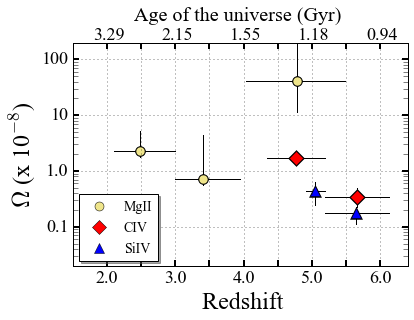

In [3]:
plt.yscale('log')

plt.plot([z_mg2, z_mg2], [omega_mg2_low, omega_mg2_upp], 'k-', lw=1.0)
plt.plot([zmin_mg2, zmax_mg2], [omega_mg2, omega_mg2], 'k-', lw=1.0)
plt.plot(z_mg2, omega_mg2, 'ko', markersize=10, alpha=1.0)  
plt.plot(z_mg2, omega_mg2, 'o',color = mg2_color,  markersize=9, alpha=1.0, label="MgII")   

for i in range(0, len(sigma5_z)):
   
    plt.plot([sigma5_z_low[i], sigma5_z_high[i]], [sigma5_values[i], sigma5_values[i]], 'k-', lw=1.0)
    plt.plot([sigma5_z[i], sigma5_z[i]], [sigma5_bound_low[i], sigma5_bound_high[i]], 'k-', lw=1.0)

    plt.plot([si4_sigma5_z_low[i], si4_sigma5_z_high[i]], 
             [si4_sigma5_values[i], si4_sigma5_values[i]], 'k-', lw=1.0)
    plt.plot([si4_sigma5_z[i], si4_sigma5_z[i]], 
             [si4_sigma5_bound_low[i], si4_sigma5_bound_high[i]], 'k-', lw=1.0)
      

plt.plot(sigma5_z, sigma5_values, 'kD', markersize=12, alpha=1.0)  
plt.plot(sigma5_z, sigma5_values, 'rD', markersize=10, alpha=1.0, label="CIV")     


plt.plot(si4_sigma5_z, si4_sigma5_values, 'k^', markersize=12, alpha=1.0)  
plt.plot(si4_sigma5_z, si4_sigma5_values, 'b^', markersize=10,alpha=1.0,  label="SiIV")  


xlabels = ['2.0', ' ', '3.0', ' ', '4.0', ' ', '5.0' , ' ', '6.0']
plt.xticks([2, 2.5, 3, 3.5, 4, 4.5, 5 , 5.5, 6], xlabels, **hfont, fontsize = 18)

ylabels = ['0.1', '1.0', '10', '100']
plt.yticks([0.1, 1 , 10, 100], ylabels, **hfont, fontsize = 18)

plt.grid(True)
plt.tick_params(direction='in', length=6, width=2)
plt.tick_params(which='minor', length=5)

plt.ylim([2.*(10.**(-2.)),200] )
plt.xlim([1.5,6.4])

plt.ylabel('$\Omega$ (x 10$^{-8}$)', **hfont,  fontsize=24)
plt.xlabel(' Redshift', **hfont,  fontsize=24)

plt.text(1.8, 230, '3.29', **hfont,  fontsize=18)
plt.text(2.8, 230, '2.15', **hfont,  fontsize=18)
plt.text(3.8, 230, '1.55', **hfont,  fontsize=18)
plt.text(4.8, 230, '1.18', **hfont,  fontsize=18)
plt.text(5.8, 230, '0.94', **hfont,  fontsize=18)
plt.text(2.4, 500, 'Age of the universe (Gyr)', **hfont,  fontsize=20)


plt.rc('legend',**{'fontsize':14})
plt.rc('font',family='Times New Roman')
plt.legend(bbox_to_anchor=(0.015, 0.015), loc=3, borderaxespad=0.1, shadow=True)



plot_name = plot_path + 'omega_values.png'
plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)




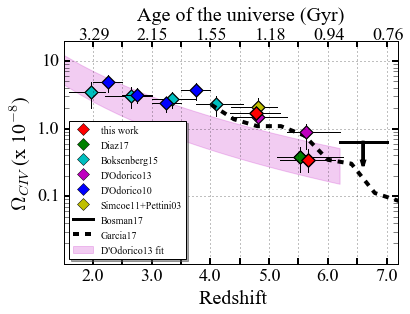

In [4]:
plt.yscale('log')

for i in range(0, len(sigma5_z)):
    plt.plot([sigma5_z_low[i], sigma5_z_high[i]], [sigma5_values[i], sigma5_values[i]], 'k-', lw=1.0)
    plt.plot([sigma5_z[i], sigma5_z[i]], [sigma5_bound_low[i], sigma5_bound_high[i]], 'k-', lw=1.0)
      
############################################################################################
############################################################################################        
# plot Diaz point with a square
# plot Diaz error bars
plt.plot([sigma5_z, sigma5_z], [sigma5_values, sigma5_values], 'kD', markersize=10, alpha=1.0)  
plt.plot(sigma5_z, sigma5_values, 'rD', markersize=9, alpha=1.0, label="this work")     


plt.plot([z_D, z_D], [omega_D_low, omega_D_upp], 'k-', lw=1.0)
plt.plot([zmin_D, zmax_D], [omega_D, omega_D], 'k-', lw=1.0)
plt.plot([z_D, z_D], [omega_D, omega_D], 'kD', markersize=10, alpha=1.0)  
plt.plot(z_D, omega_D, 'gD', markersize=9, alpha=1.0, label="Diaz17")      


plt.plot([b11_c4_sigma5_z, b11_c4_sigma5_z], 
         [b11_c4_sigma5_bound_low, b11_c4_sigma5_bound_high], 'k-', lw=1.0)
plt.plot([b11_c4_sigma5_zmin, b11_c4_sigma5_zmax], 
         [b11_c4_sigma5_values, b11_c4_sigma5_values], 'k-', lw=1.0)
     
plt.plot(b11_c4_sigma5_z, b11_c4_sigma5_values, 'kD', markersize=10, alpha=1.0)  
plt.plot(b11_c4_sigma5_z, b11_c4_sigma5_values, 'cD', markersize=9,alpha=1.0, label="Boksenberg15")  


# plot V14 point with a pentagon
# plot V14 error bars
plt.plot([z_v14, z_v14], [omega_v14_low, omega_v14_upp], 'k-', lw=1.0)
plt.plot([zmin_v14, zmax_v14], [omega_v14, omega_v14], 'k-', lw=1.0)
plt.plot(z_v14, omega_v14, 'kD', markersize=10, alpha=1.0)  
plt.plot(z_v14, omega_v14, 'mD', markersize=9, alpha=1.0, label="D'Odorico13")   

# plot V10 point with a pentagon
# plot V10 error bars
plt.plot([z_v10, z_v10], [omega_v10_low, omega_v10_upp], 'k-', lw=1.0)
plt.plot([zmin_v10, zmax_v10], [omega_v10, omega_v10], 'k-', lw=1.0)
plt.plot(z_v10, omega_v10, 'kD', markersize=10, alpha=1.0)  
plt.plot(z_v10, omega_v10, 'bD', markersize=9, alpha=1.0, label="D'Odorico10")      
    

# plot Simcoe&Pettini point with a square
# plot Simcoe&Pettini error bars
plt.plot([z_SP, z_SP], [omega_SP_low, omega_SP_upp], 'k-', lw=1.0)
plt.plot([zmin_SP, zmax_SP], [omega_SP, omega_SP], 'k-', lw=1.0)
plt.plot(z_SP, omega_SP, 'kD', markersize=10, alpha=1.0)  
plt.plot(z_SP, omega_SP, 'yD', markersize=9, alpha=1.0, label="Simcoe11+Pettini03") 


# plot the boundaries of the V14 fit
xaxis = np.array([1.5, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.7, 
                  3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7, 5.9, 6.2])
yvalues_low_v14  = (2.0 - 1.0)*pow((1.0 + xaxis)/4.0, -3.1 - 0.1)# *pow(10.0, -8.0)
yvalues_high_v14 = (2.0 + 1.0)*pow((1.0 + xaxis)/4.0, -3.1 + 0.1)# *pow(10.0, -8.0)
plt.fill_between(xaxis, yvalues_low_v14, yvalues_high_v14, color = 'm', alpha = 0.2, label="D'Odorico13 fit") 




plt.plot([6.2, 7.0], [0.63, 0.63], 'k-', lw=3.0, label="Bosman17") 
plt.arrow( 6.6, 0.63, 0.0, -0.3, fc="k", ec="k", head_width=0.05, head_length=0.05, lw=3.0)
    
# plot Angela's simulation data
plt.plot(z_AG, omega_AG, 'k--', lw=4.0, label="Garcia17") 


#overplot the data to highlight my values
plt.plot(z_v14, omega_v14, 'mD', markersize=9, alpha=1.0)   
plt.plot(sigma5_z, sigma5_values, 'rD', markersize=9, alpha=1.0)
plt.plot(z_SP, omega_SP, 'yD', markersize=9, alpha=1.0)
plt.plot([sigma5_z, sigma5_z], [sigma5_values, sigma5_values], 'kD', markersize=10, alpha=1.0)  
plt.plot(sigma5_z, sigma5_values, 'rD', markersize=9, alpha=1.0)     


# plot attributes
xlabels = ['2.0', ' ', '3.0', ' ', '4.0', ' ', '5.0' , ' ', '6.0']
plt.xticks([2, 2.5, 3, 3.5, 4, 4.5, 5 , 5.5, 6], xlabels, **hfont, fontsize = 18)
ylabels = ['0.1', '1.0', '10']
plt.yticks([0.1, 1, 10], ylabels, **hfont, fontsize = 18)


plt.grid(True)
plt.ylim([2.*(10.**(-2.)),20] )
plt.xlim([1.5,6.4])
plt.ylabel('$\Omega_{CIV}$ (x 10$^{-8}$)', **hfont,  fontsize=20)
plt.xlabel(' Redshift', **hfont,  fontsize=20)

plt.text(1.75, 21, '3.29', **hfont,  fontsize=18)
plt.text(2.75, 21, '2.15', **hfont,  fontsize=18)
plt.text(3.75, 21, '1.55', **hfont,  fontsize=18)
plt.text(4.75, 21, '1.18', **hfont,  fontsize=18)
plt.text(5.75, 21, '0.94', **hfont,  fontsize=18)
plt.text(6.75, 21, '0.76', **hfont,  fontsize=18)


plt.text(2.75, 40, 'Age of the universe (Gyr)', **hfont,  fontsize=20)
plt.tick_params(direction='in', length=6, width=2)
plt.tick_params(which='minor', length=5)

plt.legend(numpoints=1)
plt.rc('legend',**{'fontsize':10})
plt.rc('font',family='Times New Roman')
plt.legend(loc=0, borderaxespad=0.5, shadow=True)

plt.ylim([0.01,20] )
plt.xlim([1.5,7.2])

xlabels = ['2.0', ' ', '3.0', ' ', '4.0', ' ', '5.0' , ' ', '6.0', ' ', '7.0']
plt.xticks([2, 2.5, 3, 3.5, 4, 4.5, 5 , 5.5, 6, 6.5, 7.0], xlabels, **hfont, fontsize = 18)


plot_name = plot_path + 'omega_c4_compare.png'
plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)

In [5]:
b11_si4_sigma5_z = [2.09, 2.65, 3.35, 4.10]
b11_si4_sigma5_zmin=[1.85, 2.2, 3.0, 3.75]
b11_si4_sigma5_zmax=[2.2, 3.0, 3.75, 4.55]
b11_cosmo_scalar = np.array([0.84, 0.84, 0.85, 0.85])


b11_si4_sigma5_values = np.array([1.44, 1.02, 0.90, 1.57])*b11_cosmo_scalar
b11_si4_sigma5_bound_low = np.array([1.44-0.71, 1.02-0.50, 0.90-0.41, 1.57-0.91])*b11_cosmo_scalar
b11_si4_sigma5_bound_high = np.array([1.44+0.71, 1.02+0.50, 0.90+0.41, 1.57+0.91])*b11_cosmo_scalar


angela_sim_z = np.array([8.0000000, 7.5999999, 7.1999998, 6.8000002, 
                       6.4000001, 6.0000000, 5.5999999, 5.1999998, 
                       4.8000002, 4.4000001, 4.0000000])


angela_sim_value = np.array([  5.462E-09, 9.169E-09, 1.407E-08, 
                             1.998E-08, 3.830E-08, 4.516E-08, 
                             4.881E-08, 8.975E-08, 9.396E-08,
                             1.342E-07, 1.022E-07])*pow(10, 8)



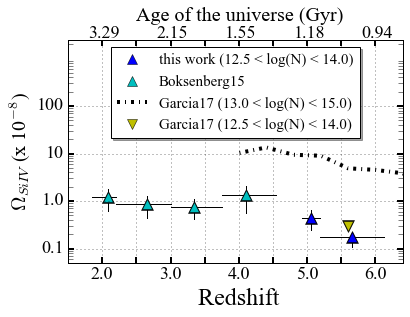

In [6]:
plt.yscale('log')


for i in range(0, len(sigma5_z)):
    plt.plot([si4_sigma5_z_low[i], si4_sigma5_z_high[i]], 
             [si4_sigma5_values[i], si4_sigma5_values[i]], 'k-', lw=1.0)
    plt.plot([si4_sigma5_z[i], si4_sigma5_z[i]], 
             [si4_sigma5_bound_low[i], si4_sigma5_bound_high[i]], 'k-', lw=1.0)
    
for i in range(0, len(b11_si4_sigma5_z)):
    plt.plot([b11_si4_sigma5_z[i], b11_si4_sigma5_z[i]], 
             [b11_si4_sigma5_bound_low[i], b11_si4_sigma5_bound_high[i]], 'k-', lw=1.0)
    plt.plot([b11_si4_sigma5_zmin[i], b11_si4_sigma5_zmax[i]], 
             [b11_si4_sigma5_values[i], b11_si4_sigma5_values[i]], 'k-', lw=1.0)
    
        

plt.plot(si4_sigma5_z, si4_sigma5_values, 'k^', markersize=12, alpha=1.0)  
plt.plot(si4_sigma5_z, si4_sigma5_values, 'b^', markersize=10,alpha=1.0,  label="this work (12.5 < log(N) < 14.0)")
 
plt.plot(b11_si4_sigma5_z, b11_si4_sigma5_values, 'k^', markersize=12, alpha=1.0)  
plt.plot(b11_si4_sigma5_z, b11_si4_sigma5_values, 'c^', markersize=10,alpha=1.0,  label="Boksenberg15")   

plt.plot(angela_sim_z, angela_sim_value, 'k-.', lw=4.0, label="Garcia17 (13.0 < log(N) < 15.0)") 

plt.plot(5.6, 0.3, 'kv', markersize=12,alpha=1.0) 
plt.plot(5.6, 0.3, 'yv', markersize=10,alpha=1.0, label="Garcia17 (12.5 < log(N) < 14.0)") 

xlabels = ['2.0', ' ', '3.0', ' ', '4.0', ' ', '5.0' , ' ', '6.0']
plt.xticks([2, 2.5, 3, 3.5, 4, 4.5, 5 , 5.5, 6], xlabels, **hfont, fontsize = 18)

ylabels = ['0.1', '1.0', '10', '100']
plt.yticks([0.1, 1 , 10, 100], ylabels, **hfont, fontsize = 18)


plt.grid(True)


plt.ylim([5.*(10.**(-2.)), 2500] )
plt.xlim([1.5,6.4])

plt.ylabel('$\Omega_{SiIV}$ (x 10$^{-8}$)', **hfont,  fontsize=20)

plt.xlabel(' Redshift', **hfont,  fontsize=24)

plt.tick_params(direction='in', length=6, width=2)
plt.tick_params(which='minor', length=5)


plt.text(1.8, 2730, '3.29', **hfont,  fontsize=18)
plt.text(2.8, 2730, '2.15', **hfont,  fontsize=18)
plt.text(3.8, 2730, '1.55', **hfont,  fontsize=18)
plt.text(4.8, 2730, '1.18', **hfont,  fontsize=18)
plt.text(5.8, 2730, '0.94', **hfont,  fontsize=18)

plt.text(2.5, 6100, 'Age of the universe (Gyr)', **hfont,  fontsize=20)
plt.rc('legend',**{'fontsize':15})
plt.rc('font',family='Times New Roman')
plt.legend(loc=9, borderaxespad=0.5, shadow=True)


plot_name = plot_path + 'omega_si4_values.png'
plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)




In [10]:
# new angela values
angela_sim_z = np.array([8.0000000, 7.5999999, 7.1999998, 6.8000002, 
                       6.4000001, 6.0000000, 5.5999999, 5.1999998, 
                       4.8000002, 4.4000001, 4.0000000])


angela_sim_value  = np.array([3.772E-09,2.707E-09,5.689E-09,6.907E-09,
                             1.746E-08,2.467E-08,3.747E-08,7.139E-08,
                             8.216E-08,1.319E-07,1.499E-07])*pow(10, 8)

 
    
angela_sim_value2 = np.array([9.625E-11,2.427E-10,4.933E-10,7.982E-10,
                              9.920E-10,1.969E-09,2.451E-09,2.596E-09,
                              3.389E-08,5.058E-09,5.848E-09])*pow(10, 8)



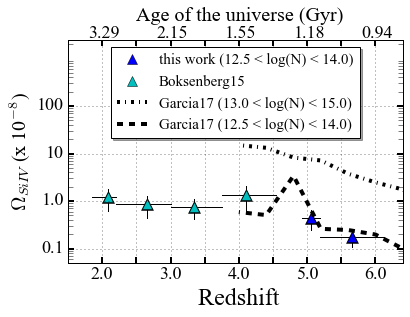

In [11]:
plt.yscale('log')


for i in range(0, len(sigma5_z)):
    plt.plot([si4_sigma5_z_low[i], si4_sigma5_z_high[i]], 
             [si4_sigma5_values[i], si4_sigma5_values[i]], 'k-', lw=1.0)
    plt.plot([si4_sigma5_z[i], si4_sigma5_z[i]], 
             [si4_sigma5_bound_low[i], si4_sigma5_bound_high[i]], 'k-', lw=1.0)
    
for i in range(0, len(b11_si4_sigma5_z)):
    plt.plot([b11_si4_sigma5_z[i], b11_si4_sigma5_z[i]], 
             [b11_si4_sigma5_bound_low[i], b11_si4_sigma5_bound_high[i]], 'k-', lw=1.0)
    plt.plot([b11_si4_sigma5_zmin[i], b11_si4_sigma5_zmax[i]], 
             [b11_si4_sigma5_values[i], b11_si4_sigma5_values[i]], 'k-', lw=1.0)
    
        

plt.plot(si4_sigma5_z, si4_sigma5_values, 'k^', markersize=12, alpha=1.0)  
plt.plot(si4_sigma5_z, si4_sigma5_values, 'b^', markersize=10,alpha=1.0,  label="this work (12.5 < log(N) < 14.0)")
 
plt.plot(b11_si4_sigma5_z, b11_si4_sigma5_values, 'k^', markersize=12, alpha=1.0)  
plt.plot(b11_si4_sigma5_z, b11_si4_sigma5_values, 'c^', markersize=10,alpha=1.0,  label="Boksenberg15")   

plt.plot(angela_sim_z, angela_sim_value, 'k-.', lw=4.0, label="Garcia17 (13.0 < log(N) < 15.0)") 
plt.plot(angela_sim_z, angela_sim_value2, 'k--', lw=4.0, label="Garcia17 (12.5 < log(N) < 14.0)") 


xlabels = ['2.0', ' ', '3.0', ' ', '4.0', ' ', '5.0' , ' ', '6.0']
plt.xticks([2, 2.5, 3, 3.5, 4, 4.5, 5 , 5.5, 6], xlabels, **hfont, fontsize = 18)

ylabels = ['0.1', '1.0', '10', '100']
plt.yticks([0.1, 1 , 10, 100], ylabels, **hfont, fontsize = 18)


plt.grid(True)


plt.ylim([5.*(10.**(-2.)), 2500] )
plt.xlim([1.5,6.4])

plt.ylabel('$\Omega_{SiIV}$ (x 10$^{-8}$)', **hfont,  fontsize=20)

plt.xlabel(' Redshift', **hfont,  fontsize=24)

plt.tick_params(direction='in', length=6, width=2)
plt.tick_params(which='minor', length=5)


plt.text(1.8, 2730, '3.29', **hfont,  fontsize=18)
plt.text(2.8, 2730, '2.15', **hfont,  fontsize=18)
plt.text(3.8, 2730, '1.55', **hfont,  fontsize=18)
plt.text(4.8, 2730, '1.18', **hfont,  fontsize=18)
plt.text(5.8, 2730, '0.94', **hfont,  fontsize=18)

plt.text(2.5, 6100, 'Age of the universe (Gyr)', **hfont,  fontsize=20)
plt.rc('legend',**{'fontsize':15})
plt.rc('font',family='Times New Roman')
plt.legend(loc=9, borderaxespad=0.5, shadow=True)


plot_name = plot_path + 'omega_si4_new_values.png'
plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)



